# Height and Weight Data Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [3]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.shape

(10000, 3)

In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### Null Value Check

In [7]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

## Visualizing Data

In [8]:
plt.style.use('ggplot')

In [9]:
sns.set_context('notebook')

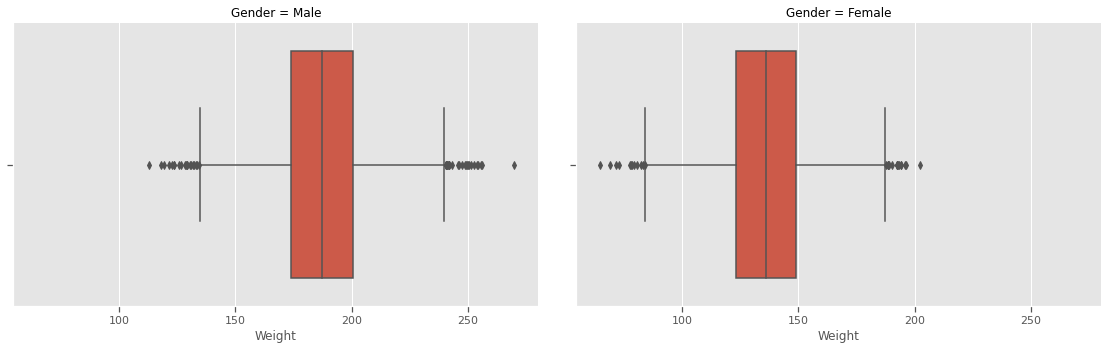

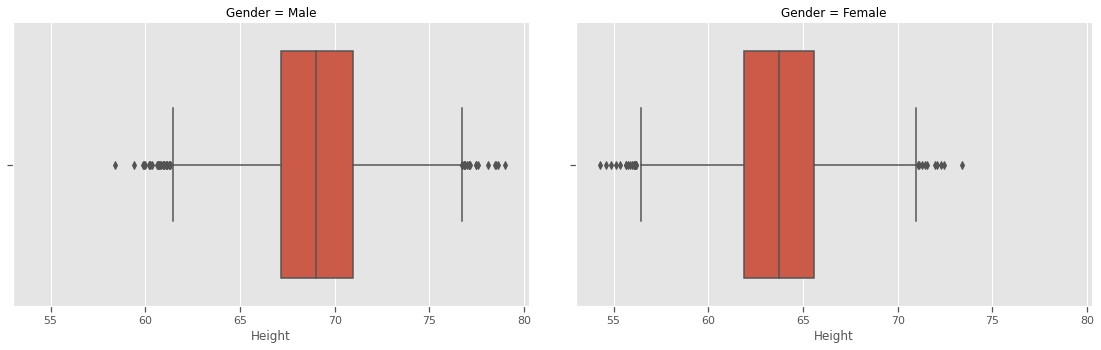

In [10]:
lst = ['Weight', 'Height']
for i in lst:
    sns.catplot(x=i,kind='box', data=df, col='Gender', orient='v', height=4)
    plt.gcf().set_size_inches(16,5)
    plt.show()

### Outlier Handling

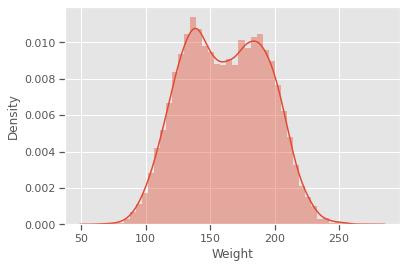

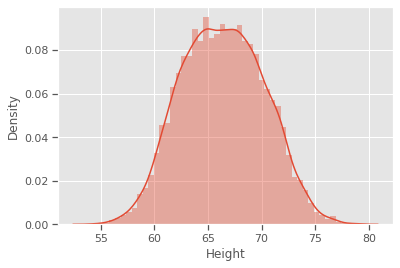

In [11]:
for i in lst:
    sns.distplot(x=df[i])
    plt.xlabel(i)
    plt.show()

In [12]:
Q1 = df.Height.quantile(0.25)

In [13]:
Q3 = df.Height.quantile(0.75)

In [14]:
IQR = Q3 - Q1

In [15]:
upper_limit = Q3 + 1.5*IQR

In [16]:
lower_limit = Q1 - 1.5*IQR

In [17]:
upper_limit,lower_limit

(77.67722359525831, 55.00265861279534)

In [18]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [19]:
df_no_outlier = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [20]:
Q1 = df.Weight.quantile(0.25)

In [21]:
Q3 = df.Weight.quantile(0.75)

In [22]:
IQR = Q3-Q1

In [23]:
lower_limit = Q1 - 1.5*IQR

In [24]:
upper_limit = Q3 + 1.5*IQR

In [25]:
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [26]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [27]:
df_no_outlier = df[(df.Weight>lower_limit)&(df.Weight<upper_limit)]
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [37]:
df_no_outlier['Gender'].replace('Male',0,inplace = True)
df_no_outlier['Gender'].replace('Female',1,inplace = True)

In [38]:
df_no_outlier.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [39]:
df_no_outlier.tail()

,Gender,Height,Weight
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461
9999,1,61.944246,113.649103


### Splitting the Data

In [40]:
features = df_no_outlier[['Gender','Height']]
features.head()

,Gender,Height
0,0,73.847017
1,0,68.781904
2,0,74.110105
3,0,71.730978
4,0,69.881796


In [41]:
X  = features
y = df_no_outlier.Weight

In [42]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Training Model and Predicting

In [43]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.predict(X_test)

array([214.04756032, 146.21160411, 193.08178569, ..., 190.41258577,
       133.57833397, 146.78271865])

In [45]:
model.score(X_test,y_test)

0.9040757170111859

#### We've 90% accuracy of the model